In [1]:
#Convert weather values to forex
#Make it so it can work with an arbitrary number of columns.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import  StandardScaler
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
data = pd.read_csv("DATA_PROJECT.csv")
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data.drop(data.tail(2).index,inplace = True)
data = data.set_index("Date")
data_test = data.tail(1000)
data.drop(data.tail(1000).index,inplace = True)

NUM_COLUMNS = data.shape[1]

In [4]:
data

,Australian dollar (AUD),Botswana pula (BWP),Brazilian real (BRL),Brunei dollar (BND),Canadian dollar (CAD),Chilean peso (CLP),Chinese yuan (CNY),Danish krone (DKK),Euro (EUR),Indian rupee (INR),...,Saudi Arabian riyal (SAR),Singapore dollar (SGD),South African rand (ZAR),Swedish krona (SEK),Swiss franc (CHF),Thai baht (THB),Trinidadian dollar (TTD),U.A.E. dirham (AED),U.K. pound (GBP),U.S. dollar (USD)
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.6583,0.2161,1.7882,1.6605,1.4520,497.93,8.2798,7.3539,1.0090,43.4800,...,3.745,1.6605,6.12150,8.4725,1.59110,36.979,6.2718,3.6725,1.64040,1.0
2000-01-04,0.6583,0.2175,1.8003,1.6575,1.4520,496.78,8.2799,7.2645,1.0305,43.5000,...,3.745,1.6575,6.12150,8.4725,1.55530,36.979,6.2680,3.6725,1.64040,1.0
2000-01-05,0.6558,0.2186,1.8329,1.6560,1.4513,496.80,8.2798,7.1800,1.0368,43.5200,...,3.745,1.6560,6.07850,8.3425,1.55080,37.259,6.2646,3.6725,1.63930,1.0
2000-01-06,0.6582,0.2181,1.8536,1.6560,1.4571,496.90,8.2797,7.1942,1.0388,43.5200,...,3.745,1.6560,6.09450,8.3425,1.54580,37.290,6.2634,3.6725,1.64920,1.0
2000-01-07,0.6539,0.2183,1.8453,1.6635,1.4600,497.80,8.2794,7.2260,1.0284,43.5100,...,3.745,1.6635,6.05850,8.3425,1.56290,37.461,6.2749,3.6725,1.64480,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,0.6890,0.0936,4.0771,1.3556,1.3164,752.60,7.0093,6.7334,1.1097,71.1569,...,3.750,1.3556,14.24400,9.4043,0.98080,30.199,6.7445,3.6725,1.30195,1.0
2019-12-23,0.6890,0.0935,4.0751,1.3566,1.3160,749.83,7.0124,6.7466,1.1075,71.1699,...,3.750,1.3566,14.21945,9.4265,0.98045,30.172,6.7602,3.6725,1.29820,1.0
2019-12-26,0.6890,0.0935,4.0751,1.3566,1.3160,751.04,7.0008,6.7466,1.1075,71.2699,...,3.750,1.3566,14.21945,9.4265,0.98045,30.172,6.7602,3.6725,1.29820,1.0


In [5]:
data_test

,Australian dollar (AUD),Botswana pula (BWP),Brazilian real (BRL),Brunei dollar (BND),Canadian dollar (CAD),Chilean peso (CLP),Chinese yuan (CNY),Danish krone (DKK),Euro (EUR),Indian rupee (INR),...,Saudi Arabian riyal (SAR),Singapore dollar (SGD),South African rand (ZAR),Swedish krona (SEK),Swiss franc (CHF),Thai baht (THB),Trinidadian dollar (TTD),U.A.E. dirham (AED),U.K. pound (GBP),U.S. dollar (USD)
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.7003,0.0939,4.0207,1.3468,1.2992,744.62,6.9670,6.6755,1.1193,71.3429,...,3.75,1.3468,14.02745,9.3341,0.97165,30.110,6.7624,3.6725,1.31985,1.0
2020-01-03,0.6966,0.0939,4.0516,1.3491,1.2988,744.62,6.9741,6.7041,1.1147,71.6949,...,3.75,1.3491,14.30955,9.4068,0.97365,30.161,6.7686,3.6725,1.30570,1.0
2020-01-06,0.6945,0.0934,4.0548,1.3505,1.2970,758.49,6.9755,6.6761,1.1194,72.0919,...,3.75,1.3505,14.24530,9.4068,0.96910,30.145,6.7737,3.6725,1.31550,1.0
2020-01-07,0.6928,0.0939,4.0835,1.3483,1.3009,771.82,6.9453,6.6891,1.1172,71.7764,...,3.75,1.3483,14.26300,9.4102,0.97045,30.140,6.7672,3.6725,1.31475,1.0
2020-01-08,0.6871,0.0934,4.0666,1.3483,1.3026,773.12,6.9394,6.7234,1.1115,72.0178,...,3.75,1.3483,14.23595,9.4397,0.97215,30.285,6.7789,3.6725,1.31080,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-26,0.6575,0.0733,4.9119,1.3397,1.3449,910.97,7.1811,6.8576,1.0871,83.1155,...,3.75,1.3397,18.91560,10.4133,0.86310,35.666,6.7083,3.6725,1.27425,1.0
2024-01-29,0.6590,0.0734,4.9219,1.3411,1.3442,916.16,7.1798,6.8870,1.0823,83.1494,...,3.75,1.3411,18.76650,10.4926,0.86300,35.585,6.7310,3.6725,1.26950,1.0
2024-01-30,0.6609,0.0734,4.9632,1.3393,1.3417,927.63,7.1773,6.8729,1.0846,83.1190,...,3.75,1.3393,18.86370,10.4159,0.86285,35.343,6.7272,3.6725,1.26795,1.0


In [6]:

#





data.head()
data.tail()
#data.drop(columns=["date"], inplace=True) Not necessary now.


,Australian dollar (AUD),Botswana pula (BWP),Brazilian real (BRL),Brunei dollar (BND),Canadian dollar (CAD),Chilean peso (CLP),Chinese yuan (CNY),Danish krone (DKK),Euro (EUR),Indian rupee (INR),...,Saudi Arabian riyal (SAR),Singapore dollar (SGD),South African rand (ZAR),Swedish krona (SEK),Swiss franc (CHF),Thai baht (THB),Trinidadian dollar (TTD),U.A.E. dirham (AED),U.K. pound (GBP),U.S. dollar (USD)
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-20,0.689,0.0936,4.0771,1.3556,1.3164,752.60,7.0093,6.7334,1.1097,71.1569,...,3.75,1.3556,14.24400,9.4043,0.98080,30.199,6.7445,3.6725,1.30195,1.0
2019-12-23,0.689,0.0935,4.0751,1.3566,1.3160,749.83,7.0124,6.7466,1.1075,71.1699,...,3.75,1.3566,14.21945,9.4265,0.98045,30.172,6.7602,3.6725,1.29820,1.0
2019-12-26,0.689,0.0935,4.0751,1.3566,1.3160,751.04,7.0008,6.7466,1.1075,71.2699,...,3.75,1.3566,14.21945,9.4265,0.98045,30.172,6.7602,3.6725,1.29820,1.0
2019-12-27,0.689,0.0939,4.0539,1.3566,1.3078,746.66,6.9996,6.6981,1.1153,71.2214,...,3.75,1.3539,14.02545,9.3808,0.97610,30.157,6.7734,3.6725,1.30790,1.0
2019-12-30,0.689,0.0939,4.0301,1.3498,1.3059,744.62,6.9870,6.6759,1.1189,71.3449,...,3.75,1.3498,14.06230,9.3200,0.97165,30.121,6.7706,3.6725,1.31215,1.0


In [7]:
data

,Australian dollar (AUD),Botswana pula (BWP),Brazilian real (BRL),Brunei dollar (BND),Canadian dollar (CAD),Chilean peso (CLP),Chinese yuan (CNY),Danish krone (DKK),Euro (EUR),Indian rupee (INR),...,Saudi Arabian riyal (SAR),Singapore dollar (SGD),South African rand (ZAR),Swedish krona (SEK),Swiss franc (CHF),Thai baht (THB),Trinidadian dollar (TTD),U.A.E. dirham (AED),U.K. pound (GBP),U.S. dollar (USD)
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.6583,0.2161,1.7882,1.6605,1.4520,497.93,8.2798,7.3539,1.0090,43.4800,...,3.745,1.6605,6.12150,8.4725,1.59110,36.979,6.2718,3.6725,1.64040,1.0
2000-01-04,0.6583,0.2175,1.8003,1.6575,1.4520,496.78,8.2799,7.2645,1.0305,43.5000,...,3.745,1.6575,6.12150,8.4725,1.55530,36.979,6.2680,3.6725,1.64040,1.0
2000-01-05,0.6558,0.2186,1.8329,1.6560,1.4513,496.80,8.2798,7.1800,1.0368,43.5200,...,3.745,1.6560,6.07850,8.3425,1.55080,37.259,6.2646,3.6725,1.63930,1.0
2000-01-06,0.6582,0.2181,1.8536,1.6560,1.4571,496.90,8.2797,7.1942,1.0388,43.5200,...,3.745,1.6560,6.09450,8.3425,1.54580,37.290,6.2634,3.6725,1.64920,1.0
2000-01-07,0.6539,0.2183,1.8453,1.6635,1.4600,497.80,8.2794,7.2260,1.0284,43.5100,...,3.745,1.6635,6.05850,8.3425,1.56290,37.461,6.2749,3.6725,1.64480,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,0.6890,0.0936,4.0771,1.3556,1.3164,752.60,7.0093,6.7334,1.1097,71.1569,...,3.750,1.3556,14.24400,9.4043,0.98080,30.199,6.7445,3.6725,1.30195,1.0
2019-12-23,0.6890,0.0935,4.0751,1.3566,1.3160,749.83,7.0124,6.7466,1.1075,71.1699,...,3.750,1.3566,14.21945,9.4265,0.98045,30.172,6.7602,3.6725,1.29820,1.0
2019-12-26,0.6890,0.0935,4.0751,1.3566,1.3160,751.04,7.0008,6.7466,1.1075,71.2699,...,3.750,1.3566,14.21945,9.4265,0.98045,30.172,6.7602,3.6725,1.29820,1.0


In [8]:
data.isnull().sum()

Australian dollar   (AUD)                           0
Botswana pula   (BWP)                               0
Brazilian real   (BRL)                              0
Brunei dollar   (BND)                               0
Canadian dollar   (CAD)                             0
Chilean peso   (CLP)                                0
Chinese yuan   (CNY)                                0
Danish krone   (DKK)                                0
Euro   (EUR)                                        0
Indian rupee   (INR)                                0
Japanese yen   (JPY)                                0
Korean won   (KRW)                                  0
Kuwaiti dinar   (KWD)                               0
Malaysian ringgit   (MYR)                           0
Maltese lira   (MTL)                                0
New Zealand dollar   (NZD)                          0
Norwegian krone   (NOK)                             0
Omani rial   (OMR)                                  0
Qatari riyal   (QAR)        

In [9]:
#Example goes over looking and removing outliers, I will
#ignore that for the time being


In [10]:
from sklearn.preprocessing import MinMaxScaler

#OLD CODE BELOW
# scaler=MinMaxScaler()
# scaler2=MinMaxScaler()
# scaler3=MinMaxScaler()
# scaler4=MinMaxScaler()

# meantemp_scaled = scaler.fit_transform(data[['AUD']]) 
# humidity_scaled = scaler2.fit_transform(data[['BWP']])
# windspeed_scaled = scaler3.fit_transform(data[['BRL']])
# meanpressure_scaled = scaler4.fit_transform(data[['BND']])
# X_scaled = np.concatenate((meantemp_scaled, humidity_scaled, windspeed_scaled, meanpressure_scaled), axis=1)
# X_scaled.shape

In [11]:
scalers = []
for col in data.columns:
    scaler = StandardScaler()
    scaler.fit(data[[col]])
    scalers.append(scaler)
scaled_columns = [scaler.transform(data[[col]]) for scaler, col in zip(scalers, data.columns)]
X_scaled = np.concatenate(scaled_columns, axis=1)
X_scaled.shape


(5100, 29)

In [12]:
x=[]
for i in range(X_scaled.shape[0]-30):
    row = X_scaled[i:i+31] #Has 31 items, 
    x.append(row)

x=np.array(x)
#print(x.shape)
#print(x)
#print(x[0][-1])
X_train = x[:,:-1] #1st 30 values will be considered as x values, up to -1
Y_train = x[:,-1] #last value will be considered as our y value. Only predicting first one.
X_train.shape ,Y_train.shape, X_train.ndim, Y_train.ndim
print(Y_train.shape)


(5070, 29)


In [13]:

#Is there something wrong with the scaler?

In [14]:
X_train = X_train.reshape(-1,NUM_COLUMNS,30) #Replace with actual number of columns 
X_train.shape

(5070, 29, 30)

In [15]:
model=Sequential()
model.add(LSTM(100, input_shape=(NUM_COLUMNS,30), return_sequences=True))
model.add(LSTM(100, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(100, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(100, return_sequences=False, recurrent_dropout=0.2))
model.add(Dense(NUM_COLUMNS, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, batch_size=32, epochs=20) #JUST for now


Epoch 1/20
159/159 [==============================] - 22s 91ms/step - loss: 0.1782
Epoch 2/20
159/159 [==============================] - 14s 90ms/step - loss: 0.0698
Epoch 3/20
159/159 [==============================] - 14s 90ms/step - loss: 0.0626
Epoch 4/20
159/159 [==============================] - 14s 91ms/step - loss: 0.0557
Epoch 5/20
159/159 [==============================] - 14s 90ms/step - loss: 0.0526
Epoch 6/20
159/159 [==============================] - 14s 88ms/step - loss: 0.0512
Epoch 7/20
159/159 [==============================] - 14s 88ms/step - loss: 0.0487
Epoch 8/20
159/159 [==============================] - 14s 89ms/step - loss: 0.0496
Epoch 9/20
159/159 [==============================] - 14s 88ms/step - loss: 0.0468
Epoch 10/20
159/159 [==============================] - 14s 88ms/step - loss: 0.0467
Epoch 11/20
159/159 [==============================] - 14s 88ms/step - loss: 0.0464
Epoch 12/20
159/159 [==============================] - 14s 88ms/step - loss: 0.0459
E

In [16]:
new_data = pd.DataFrame()
new_data = (data.tail(30)).append(data_test)
#new_data.drop(columns=['date'],inplace=True)


C:\Users\ankit\AppData\Local\Temp\ipykernel_34716\2633649504.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = (data.tail(30)).append(data_test)


In [17]:
# meantemp_scaled1 = scaler.fit_transform(new_data[['AUD']]) 
# humidity_scaled1 = scaler2.fit_transform(new_data[['BWP']])
# windspeed_scaled1 = scaler3.fit_transform(new_data[['BRL']])
# meanpressure_scaled1 = scaler4.fit_transform(new_data[['BND']])
# new_data_scaled = np.concatenate((meantemp_scaled1, humidity_scaled1, windspeed_scaled1, meanpressure_scaled1), axis=1)
# new_data_scaled.shape

In [18]:
#Create new_data_scaled with a for loop instead of one by one.
print(scalers)
print(new_data.shape)
scaled_columns = [scaler.transform(new_data[[col]]) for scaler, col in zip(scalers, new_data)]
new_data_scaled = np.concatenate(scaled_columns, axis=1)
new_data_scaled.shape


[StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler()]
(1030, 29)


(1030, 29)

In [19]:
x1=[]
for i in range(new_data_scaled.shape[0]-30):
    row = new_data_scaled[i:i+31]
    x1.append(row)
    
x1=np.array(x1)
X_test = x1[:,:-1]
Y_test = x1[:,-1]
print(Y_test.shape)
X_test.shape ,Y_test.shape, X_test.ndim, Y_test.ndim
X_test = X_test.reshape(-1,NUM_COLUMNS,30)
print(new_data_scaled.shape)

(1000, 29)
(1030, 29)


In [20]:
predictions = model.predict(X_test)
 #Predicts 1000 29 values for one thousand columns.
print(predictions.shape)
#Uses 0 cuz that is the column value we are predicting.
predictions = np.hstack([scaler.inverse_transform(predictions[:, i].reshape(-1, 1)) for i, scaler in enumerate(scalers)])
#converting the predictions to original scale again
print(predictions.shape)
print(Y_test.shape) #Oriinal
#convert Y_test to same shape as predictions #Is this necessary now?
#Need to scale each column of Y_test individually now.
print(Y_test)
Y_test = np.hstack([scaler.inverse_transform(Y_test[:, i].reshape(-1, 1)) for i, scaler in enumerate(scalers)])

print(Y_test)


32/32 [==============================] - 2s 17ms/step
(1000, 29)
(1000, 29)
(1000, 29)
[[-0.5255571  -1.3112453   2.04618407 ... -0.01400417 -1.30059111
   0.        ]
 [-0.55042332 -1.3112453   2.08902122 ... -0.01400417 -1.36893303
   0.        ]
 [-0.56453657 -1.3239256   2.09345743 ... -0.01400417 -1.32160081
   0.        ]
 ...
 [-0.79034867 -1.83113752  3.35278631 ... -0.01400417 -1.55125864
   0.        ]
 [-0.81387076 -1.83367358  3.33850727 ... -0.01400417 -1.54811926
   0.        ]
 [-0.82798402 -1.82860146  3.31286043 ... -0.01400417 -1.56647257
   0.        ]]
[[0.7003  0.0939  4.0207  ... 3.6725  1.31985 1.     ]
 [0.6966  0.0939  4.0516  ... 3.6725  1.3057  1.     ]
 [0.6945  0.0934  4.0548  ... 3.6725  1.3155  1.     ]
 ...
 [0.6609  0.0734  4.9632  ... 3.6725  1.26795 1.     ]
 [0.6574  0.0733  4.9529  ... 3.6725  1.2686  1.     ]
 [0.6553  0.0735  4.9344  ... 3.6725  1.2648  1.     ]]


In [21]:
r2_score = r2_score(Y_test, predictions)
r2_score

-4.123866521068986e+24

In [22]:
mae = mean_absolute_error(Y_test, predictions)
mae

5.47664035416354

In [23]:
print(Y_test.shape)

(1000, 29)


(1000,)


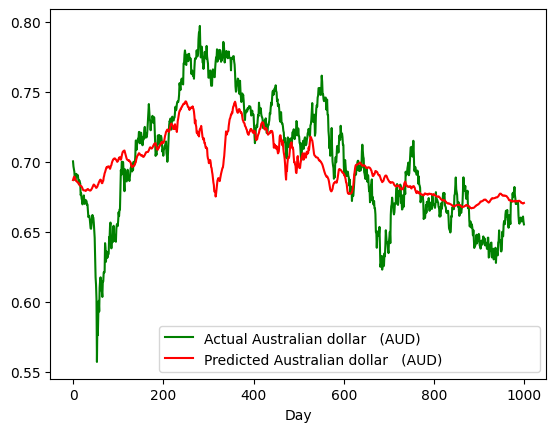

In [24]:
columns = data.columns
for i in range(NUM_COLUMNS):
    prediction = predictions[:,i]
    test = Y_test[:,i]
    print(prediction.shape)
    plt.plot(test, label=f'Actual {columns[i]}', color='green') 
    plt.plot(prediction, label=f'Predicted {columns[i]}', color='red') 
    plt.legend(loc='best')
    plt.xlabel('Day')
    plt.ylabel('')
    plt.show()
    break
    

#What column is it actually predicting?  


In [26]:
import warnings
import tensorflow as tf
# Suppress Python warnings
warnings.filterwarnings('ignore')

# Set TensorFlow logging level
tf.get_logger().setLevel('ERROR')

In [72]:

ongoing_predictions = Y_test[-30:].reshape(-1,29,30)
#Given last 30 values, predict 1000 days in advance, using the current days
for i in range(600):
    #print(ongoing_predictions.shape)
    #print(ongoing_predictions[:,:,-30:].shape)
    next_prediction_unscaled = model.predict(ongoing_predictions[:,:,-30:])
    next_prediction_unscaled = next_prediction_unscaled.reshape(1,29,1)

    if (ongoing_predictions == []):
        ongoing_predictions = np.array([next_prediction_unscaled])
    else:
        ongoing_predictions = np.concatenate((ongoing_predictions,next_prediction_unscaled),axis=2)
print(ongoing_predictions.shape)


    

1/1 [==============================] - 0s 25ms/step
(1, 29, 630)


In [43]:
import pprint

Split into Train and Test datasets before going into this code, etc.
Replace values with the values used for forex.

In [ ]:
print

In [68]:
pprint.pprint(ongoing_predictions)



array([[[ 0.6712    ,  0.0741    ,  4.8906    , ..., -0.10250868,
         -0.03934193,  0.04706163],
        [ 0.0747    ,  4.9391    ,  1.3277    , ...,  0.97598642,
          0.70405674,  0.01108897],
        [ 4.9393    ,  1.3324    ,  1.3387    , ..., -0.2646741 ,
          0.02478601,  0.66586018],
        ...,
        [ 3.6725    ,  1.2695    ,  1.        , ..., -0.0669075 ,
         -0.08393283,  0.02203489],
        [ 1.26795   ,  1.        ,  0.6574    , ...,  0.45132262,
         -0.28621411, -1.34440958],
        [ 1.        ,  0.6553    ,  0.0735    , ..., -0.015011  ,
         -0.09934704, -0.13174047]]])


In [73]:

print(ongoing_predictions[0,0,:].shape)
print(ongoing_predictions[0,0,:])

(630,)
[ 6.71200000e-01  7.41000000e-02  4.89060000e+00  1.32960000e+00
  1.34190000e+00  8.76770000e+02  7.13790000e+00  6.82900000e+00
  1.09190000e+00  8.33500000e+01  1.42430000e+02  1.31650000e+03
  3.07550000e-01  4.66150000e+00  3.42737000e+00  6.21500000e-01
  1.09623000e+01  3.84500000e-01  3.64000000e+00  3.75000000e+00
  1.32960000e+00  1.86113000e+01  1.04542000e+01  8.68350000e-01
  3.51330000e+01  6.75580000e+00  3.67250000e+00  1.26920000e+00
  1.00000000e+00  6.71700000e-01 -9.65837955e-01 -1.27288520e+00
 -1.57651973e+00 -1.77886820e+00 -1.74466264e+00 -1.77905118e+00
 -1.78502667e+00 -1.72459674e+00 -1.71677804e+00 -1.51409829e+00
 -1.42289126e+00 -1.38688266e+00 -1.46586275e+00 -1.39621484e+00
 -1.11454451e+00 -1.00018108e+00 -5.36083616e-02 -1.02508679e-01
 -3.93419303e-02  4.70616333e-02  1.02129802e-01 -1.00792795e-01
  4.34975028e-01  8.01158607e-01  1.32292485e+00  4.14529145e-01
  1.51877689e+00  1.18141460e+00  5.01277387e-01  4.17434365e-01
 -3.30485016e-01 -

(600, 29)
[0.63478785 0.58910036 0.54392067 0.51381197 0.51890163 0.51378475
 0.51289562 0.52188736 0.52305076 0.55320875 0.56678002 0.57213796
 0.56038602 0.57074937 0.61266087 0.62967772 0.77052422 0.76324803
 0.77264701 0.78550354 0.79369748 0.76350335 0.84322361 0.89771036
 0.97534724 0.84018134 1.00448929 0.95429104 0.85308915 0.84061362
 0.729326   0.76335457 0.81385159 0.79884895 0.82938472 0.8264491
 0.82833707 0.85205076 0.8278407  0.86076806 0.8245576  0.8482121
 0.86312893 0.8149597  0.87607783 0.83820144 0.79897784 0.84347309
 0.77677948 0.80190983 0.77849255 0.77864901 0.78023001 0.78676649
 0.81673086 0.83850736 0.8180027  0.81941199 0.79873429 0.82312349
 0.8237356  0.83074312 0.83551921 0.83034444 0.832437   0.81992583
 0.82050602 0.82187129 0.81258398 0.82789175 0.82915494 0.8367293
 0.84990212 0.85474319 0.86338162 0.86846042 0.87850971 0.88675265
 0.89085661 0.89451575 0.89139766 0.88867075 0.88547443 0.88088714
 0.87745331 0.87132148 0.87030172 0.86713844 0.86566692

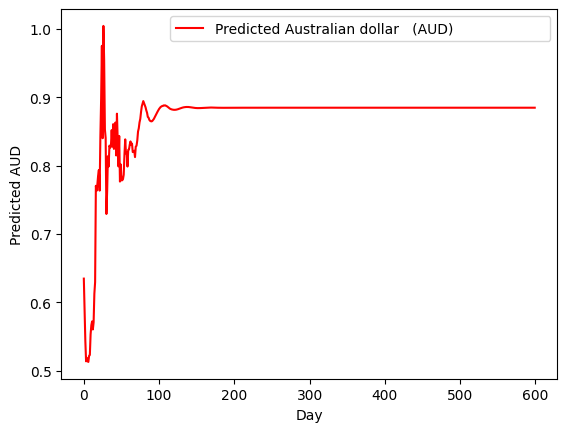

In [77]:
# (1,29,50)
scaled_preds = np.hstack([scaler.inverse_transform(ongoing_predictions[:, i,30:].reshape(-1, 1)) for i, scaler in enumerate(scalers)])
print(scaled_preds.shape)
plot_data = scaled_preds[:,0]
print(plot_data)
plt.plot(plot_data, label=f'Predicted {columns[0]}', color='red')
plt.legend(loc='best')
plt.xlabel('Day')
plt.ylabel('Predicted AUD')
plt.show()
    
    
    

(1, 29, 30)
1/1 [==============================] - 0s 26ms/step
[[ 0.0138527   0.45926392 -0.58252174  0.37869906 -0.80412644 -0.8950885
   0.6529057  -0.6760462   0.59939307 -0.8282239   0.27948985 -1.5580436
  -0.71320784 -0.19837011  0.06464993 -0.17090395 -0.81091577 -0.00575778
  -0.00952772  0.19397223  0.35419628 -0.80951357 -0.64903456  0.15626349
   0.03954644 -0.68386    -0.03290586  1.2434721  -0.03148158]]
(1, 29, 30)
1/1 [==============================] - 0s 24ms/step
[[ 0.0138527   0.45926392 -0.58252174  0.37869906 -0.80412644 -0.8950885
   0.6529057  -0.6760462   0.59939307 -0.8282239   0.27948985 -1.5580436
  -0.71320784 -0.19837011  0.06464993 -0.17090395 -0.81091577 -0.00575778
  -0.00952772  0.19397223  0.35419628 -0.80951357 -0.64903456  0.15626349
   0.03954644 -0.68386    -0.03290586  1.2434721  -0.03148158]]
(1, 29, 30)
1/1 [==============================] - 0s 26ms/step
[[ 0.0138527   0.45926392 -0.58252174  0.37869906 -0.80412644 -0.8950885
   0.6529057  -0.67